In [23]:
import numpy as numpy
from keras.models import Sequential
from keras.layers import Dense,Flatten
from keras.utils import to_categorical
from keras.datasets import cifar10
from keras.optimizers import Adam,SGD,RMSprop
import matplotlib.pyplot as plt

uint8
(50000, 32, 32, 3)
[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]
Label: [6]


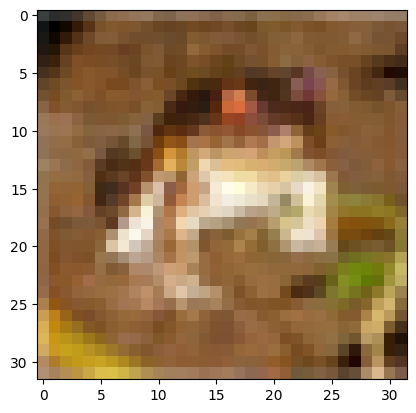

In [5]:
#Load the dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.dtype)
print(x_train.shape)
print(x_train[0])
plt.imshow(x_train[0])
print(f"Label: {y_train[0]}")
plt.show()

In [6]:
#Normalize the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0



In [7]:
#To categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [12]:
#Build the model
model = Sequential()
model.add(Flatten(input_shape=(32,32,3)))
model.add(Dense(128, activation='relu'))#128 neurons in hidden layer
model.add(Dense(10, activation='softmax'))#10 neurons in output layer for 10 classes

In [16]:
#Compile the model
model.compile(optimizer=Adam(learning_rate=0.01), loss='categorical_crossentropy',metrics=['accuracy'])
#Train the model
history=model.fit(x_train, y_train, epochs=10, batch_size=64,validation_split=0.2)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.1815 - loss: 2.0473 - val_accuracy: 0.1836 - val_loss: 2.0648
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.1815 - loss: 2.0473 - val_accuracy: 0.1836 - val_loss: 2.0648
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.1845 - loss: 2.0515 - val_accuracy: 0.1642 - val_loss: 2.0558
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.1845 - loss: 2.0515 - val_accuracy: 0.1642 - val_loss: 2.0558
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.1817 - loss: 2.0496 - val_accuracy: 0.1714 - val_loss: 2.0875
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.1817 - loss: 2.0496 - val_accuracy: 0.1714 - val_loss: 2.0875
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.1827 - loss: 2.0466 - val_accuracy: 0.1887 - val_loss: 2.0542
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.1827 - loss: 2.0466 - val_accuracy: 0.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1879 - loss: 2.0700
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1879 - loss: 2.0700
Test Accuracy: 18.79%
Test Loss: 2.0700
{'accuracy': [0.18152500689029694, 0.1845249980688095, 0.18174999952316284, 0.1826999932527542, 0.18302500247955322, 0.18367500603199005, 0.18297499418258667, 0.18320000171661377, 0.18102499842643738, 0.1827249974012375], 'loss': [2.047306776046753, 2.051481246948242, 2.0495502948760986, 2.046609401702881, 2.0457680225372314, 2.0468008518218994, 2.049881935119629, 2.049229145050049, 2.051595449447632, 2.0482044219970703], 'val_accuracy': [0.18359999358654022, 0.16419999301433563, 0.17139999568462372, 0.18870000541210175, 0.17890000343322754, 0.16779999434947968, 0.16380000114440918, 0.18330000340938568, 0.18539999425411224, 0.1818999946117401], 'val_loss': [2.064826250076294, 2.0557610988616943, 2.087470293045044, 2.054152250289917, 2.050523281097412, 2.1512069702148438, 2.068876028060913, 2.0671148

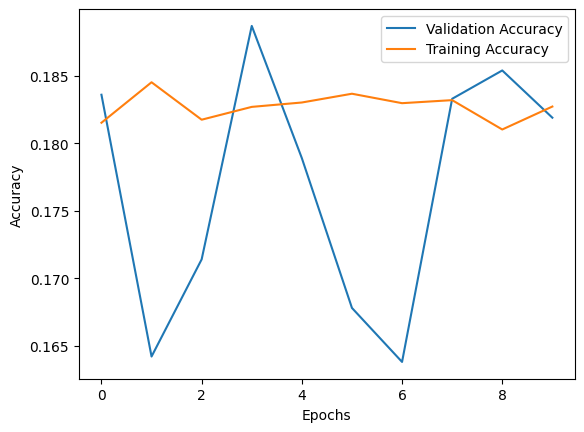

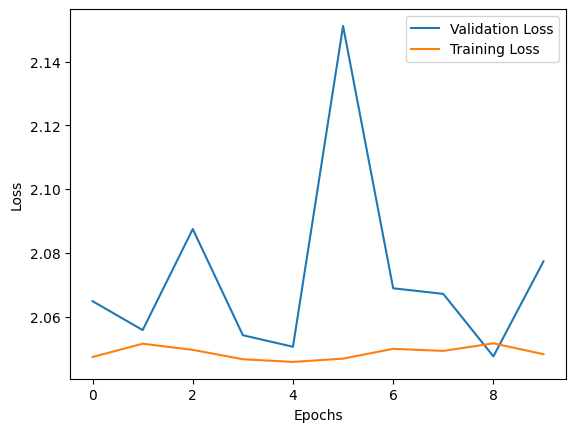

In [17]:
loss,accuracy=model.evaluate(x_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")
print(f"Test Loss: {loss:.4f}")
print(history.history)

#Visualization
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['loss'], label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()  

Experiment with Depth(Number of Layers)

In [20]:
#Build the model with 3 hidden layers
model = Sequential()
model.add(Flatten(input_shape=(32,32,3)))
model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))#256 neurons in hidden layer
model.add(Dense(10, activation='softmax'))#10 neurons in output layer for 10 classes

c:\Users\Finex\Desktop\AI_Bootcamp\ai_2\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [21]:
#Compile the model
model.compile(optimizer=Adam(learning_rate=0.01), loss='categorical_crossentropy',metrics=['accuracy'])
#Train the model
hist=model.fit(x_train, y_train, epochs=10, batch_size=64,validation_split=0.2)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.2411 - loss: 2.5837 - val_accuracy: 0.2884 - val_loss: 1.9020
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.2411 - loss: 2.5837 - val_accuracy: 0.2884 - val_loss: 1.9020
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 0.2856 - loss: 1.9074 - val_accuracy: 0.3001 - val_loss: 1.9091
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 0.2856 - loss: 1.9074 - val_accuracy: 0.3001 - val_loss: 1.9091
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - accuracy: 0.3010 - loss: 1.8838 - val_accuracy: 0.3007 - val_loss: 1.8869
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - accuracy: 0.3010 - loss: 1.8838 - val_accuracy: 0.3007 - val_loss: 1.8869
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - accuracy: 0.3067 - loss: 1.8713 - val_accuracy: 0.3142 - val_loss: 1.8815
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - accuracy: 0.3067 - loss: 1.8713 - 

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.3095 - loss: 1.8594
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.3095 - loss: 1.8594
Test Accuracy: 30.95%
Test Loss: 1.8594
{'accuracy': [0.24112500250339508, 0.28562501072883606, 0.3009999990463257, 0.306674987077713, 0.3122999966144562, 0.3179999887943268, 0.31804999709129333, 0.31907498836517334, 0.31755000352859497, 0.3148750066757202], 'loss': [2.5837173461914062, 1.907436728477478, 1.8837507963180542, 1.871341347694397, 1.8649245500564575, 1.8535254001617432, 1.8479655981063843, 1.8538148403167725, 1.8472206592559814, 1.847892165184021], 'val_accuracy': [0.28839999437332153, 0.3000999987125397, 0.30070000886917114, 0.3142000138759613, 0.2842999994754791, 0.3077000081539154, 0.31150001287460327, 0.30239999294281006, 0.3098999857902527, 0.302700012922287], 'val_loss': [1.9019734859466553, 1.9090771675109863, 1.8868519067764282, 1.8814970254898071, 1.9323782920837402, 1.8744460344314575, 1.869094967842102, 1.879103302

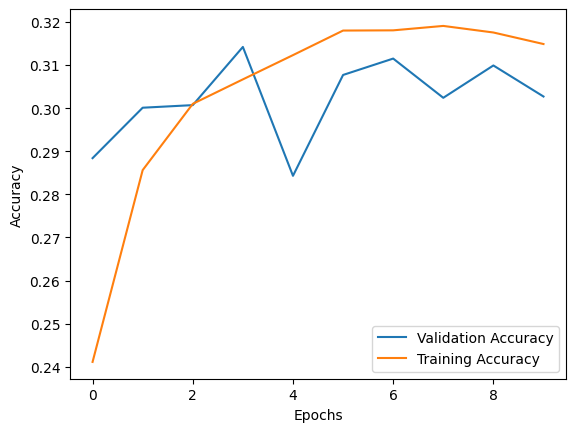

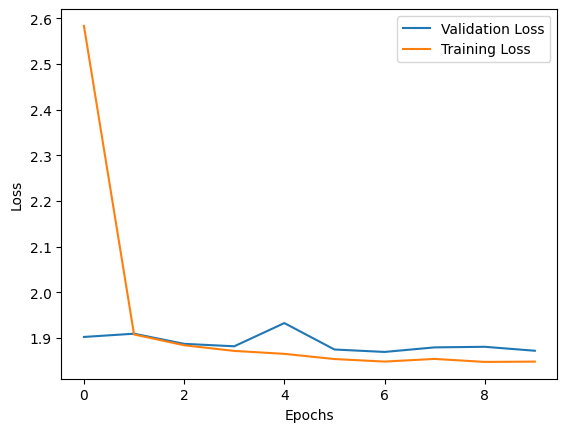

In [22]:
loss,accuracy=model.evaluate(x_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")
print(f"Test Loss: {loss:.4f}")
print(hist.history)

#Visualization
plt.plot(hist.history['val_accuracy'], label='Validation Accuracy')
plt.plot(hist.history['accuracy'], label='Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.plot(hist.history['loss'], label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()  

In [17]:
#Build the model with 5 hidden layers
model = Sequential()
model.add(Flatten(input_shape=(32,32,3)))
model.add(Dense(2048, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))#256 neurons in hidden layer
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))#10 neurons in output layer for 10 classes

In [18]:
#Compile the model
model.compile(optimizer=Adam(learning_rate=0.01), loss='categorical_crossentropy',metrics=['accuracy'])
#Train the model
mod_2=model.fit(x_train, y_train, epochs=10, batch_size=64,validation_split=0.2)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 33s 51ms/step - accuracy: 0.2015 - loss: 3.8297 - val_accuracy: 0.2414 - val_loss: 1.9864
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 33s 51ms/step - accuracy: 0.2015 - loss: 3.8297 - val_accuracy: 0.2414 - val_loss: 1.9864
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 32s 51ms/step - accuracy: 0.2495 - loss: 1.9712 - val_accuracy: 0.2583 - val_loss: 1.9537
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 32s 51ms/step - accuracy: 0.2495 - loss: 1.9712 - val_accuracy: 0.2583 - val_loss: 1.9537
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 32s 51ms/step - accuracy: 0.2534 - loss: 1.9465 - val_accuracy: 0.2578 - val_loss: 2.0183
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 32s 51ms/step - accuracy: 0.2534 - loss: 1.9465 - val_accuracy: 0.2578 - val_loss: 2.0183
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 32s 51ms/step - accuracy: 0.2643 - loss: 1.9323 - val_accuracy: 0.2795 - val_loss: 1.9150
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 32s 51ms/step - accuracy: 0.2643 - loss: 1.9323 - 

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.3205 - loss: 1.8295
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.3205 - loss: 1.8295
Test Accuracy: 32.05%Test Accuracy: 32.05%
Test Loss: 1.8295
{'accuracy': [0.20147499442100525, 0.24950000643730164, 0.25337499380111694, 0.2642500102519989, 0.26497501134872437, 0.27242499589920044, 0.2791750133037567, 0.30117499828338623, 0.3120500147342682, 0.31482499837875366], 'loss': [3.8296961784362793, 1.9711651802062988, 1.946515679359436, 1.9322564601898193, 1.9294252395629883, 1.9126805067062378, 1.9027739763259888, 1.873579502105713, 1.852880835533142, 1.8447645902633667], 'val_accuracy': [0.24140000343322754, 0.2583000063896179, 0.25780001282691956, 0.27950000762939453, 0.26190000772476196, 0.28679999709129333, 0.2858999967575073, 0.3095000088214874, 0.3034000098705292, 0.3125], 'val_loss': [1.9864425659179688, 1.9537343978881836, 2.018324851989746, 1.9149773120880127, 1.9426254034042358, 1.8995997905731201, 1.901486754417419

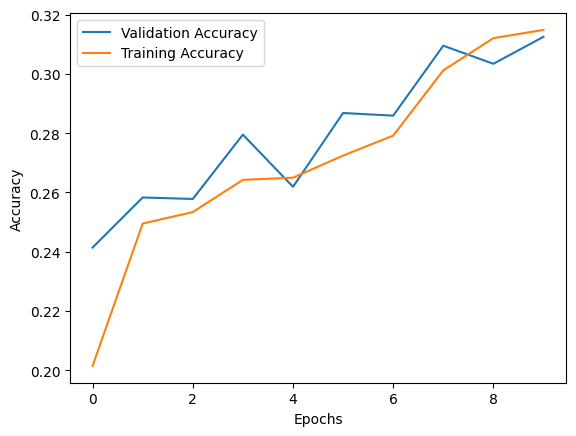

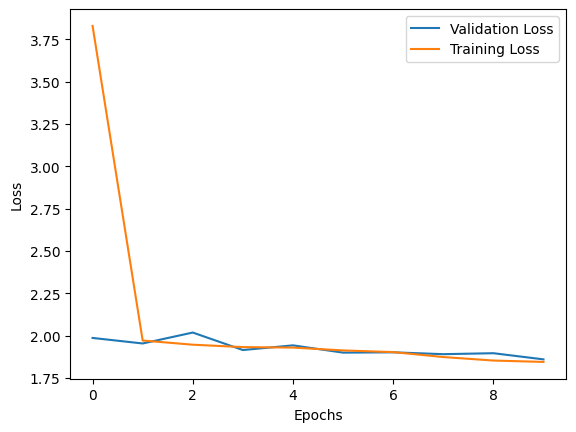

In [20]:
#test the model
loss,accuracy=model.evaluate(x_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")
print(f"Test Loss: {loss:.4f}")
print(mod_2.history)

#Visualization
plt.plot(mod_2.history['val_accuracy'], label='Validation Accuracy')
plt.plot(mod_2.history['accuracy'], label='Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(mod_2.history['val_loss'], label='Validation Loss')
plt.plot(mod_2.history['loss'], label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show() 

comparison based on optimizer

In [ ]:
#Build the model for Adam optimizer
model1 = Sequential()
model1.add(Flatten(input_shape=(32,32,3)))
model1.add(Dense(128, activation='relu'))#128 neurons in hidden layer
model1.add(Dense(10, activation='softmax'))#10 neurons in output layer for 10 classes

c:\Users\Finex\Desktop\AI_Bootcamp\ai_2\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
#Compile the model with Adam
model1.compile(optimizer=Adam(learning_rate=0.01), loss='categorical_crossentropy',metrics=['accuracy'])
#Train the model
mode1=model1.fit(x_train, y_train, epochs=10, batch_size=64,validation_split=0.2)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.1000 - loss: 2.5791 - val_accuracy: 0.0977 - val_loss: 2.3032
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.1000 - loss: 2.5791 - val_accuracy: 0.0977 - val_loss: 2.3032
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.0984 - loss: 2.3034 - val_accuracy: 0.0977 - val_loss: 2.3028
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.0984 - loss: 2.3034 - val_accuracy: 0.0977 - val_loss: 2.3028
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.0995 - loss: 2.3034 - val_accuracy: 0.0952 - val_loss: 2.3038
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.0995 - loss: 2.3034 - val_accuracy: 0.0952 - val_loss: 2.3038
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.0990 - loss: 2.3035 - val_accuracy: 0.0977 - val_loss: 2.3038
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.0990 - loss: 2.3035 - val_accuracy: 0.

In [37]:
#Evaluate Adam optimizer
loss1,accuracy1=model1.evaluate(x_test, y_test)
print(f"Adam - Test Accuracy: {accuracy1 * 100:.2f}%")
print(f"Adam - Test Loss: {loss1:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1000 - loss: 2.3037
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1000 - loss: 2.3037
Adam - Test Accuracy: 10.00%
Adam - Test Loss: 2.3037
Adam - Test Accuracy: 10.00%
Adam - Test Loss: 2.3037


In [38]:
#Build the model for SGD optimizer
model2 = Sequential()
model2.add(Flatten(input_shape=(32,32,3)))
model2.add(Dense(128, activation='relu'))#128 neurons in hidden layer
model2.add(Dense(10, activation='softmax'))#10 neurons in output layer for 10 classes

#Compile the model with SGD
model2.compile(optimizer=SGD(learning_rate=0.01), loss='categorical_crossentropy',metrics=['accuracy'])
#Train the model
mode2=model2.fit(x_train, y_train, epochs=10, batch_size=64,validation_split=0.2)

c:\Users\Finex\Desktop\AI_Bootcamp\ai_2\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.2960 - loss: 1.9638 - val_accuracy: 0.3401 - val_loss: 1.8671
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.2960 - loss: 1.9638 - val_accuracy: 0.3401 - val_loss: 1.8671
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.3650 - loss: 1.8012 - val_accuracy: 0.3748 - val_loss: 1.7878
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.3650 - loss: 1.8012 - val_accuracy: 0.3748 - val_loss: 1.7878
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.3943 - loss: 1.7260 - val_accuracy: 0.3941 - val_loss: 1.7247
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.3943 - loss: 1.7260 - val_accuracy: 0.3941 - val_loss: 1.7247
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4157 - loss: 1.6755 - val_accuracy: 0.4029 - val_loss: 1.7200
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4157 - loss: 1.6755 - val_accuracy: 0.

In [39]:
#Evaluate SGD optimizer
loss2,accuracy2=model2.evaluate(x_test, y_test)
print(f"SGD - Test Accuracy: {accuracy2 * 100:.2f}%")
print(f"SGD - Test Loss: {loss2:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4429 - loss: 1.5851
SGD - Test Accuracy: 44.29%
SGD - Test Loss: 1.5851
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4429 - loss: 1.5851
SGD - Test Accuracy: 44.29%
SGD - Test Loss: 1.5851


In [40]:
#Build the model for RMSprop optimizer
model3 = Sequential()
model3.add(Flatten(input_shape=(32,32,3)))
model3.add(Dense(128, activation='relu'))#128 neurons in hidden layer
model3.add(Dense(10, activation='softmax'))#10 neurons in output layer for 10 classes

#Compile the model with RMSprop
model3.compile(optimizer=RMSprop(learning_rate=0.01), loss='categorical_crossentropy',metrics=['accuracy'])
#Train the model
mode3=model3.fit(x_train, y_train, epochs=10, batch_size=64,validation_split=0.2)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.0990 - loss: 2.9166 - val_accuracy: 0.0978 - val_loss: 2.3039
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.0990 - loss: 2.9166 - val_accuracy: 0.0978 - val_loss: 2.3039
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.1231 - loss: 2.2638 - val_accuracy: 0.1654 - val_loss: 2.1386
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.1231 - loss: 2.2638 - val_accuracy: 0.1654 - val_loss: 2.1386
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.1618 - loss: 2.1627 - val_accuracy: 0.1699 - val_loss: 2.2401
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.1618 - loss: 2.1627 - val_accuracy: 0.1699 - val_loss: 2.2401
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.1660 - loss: 2.1490 - val_accuracy: 0.1802 - val_loss: 2.1156
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.1660 - loss: 2.1490 - val_accuracy: 0.

In [41]:
#Evaluate RMSprop optimizer
loss3,accuracy3=model3.evaluate(x_test, y_test)
print(f"RMSprop - Test Accuracy: {accuracy3 * 100:.2f}%")
print(f"RMSprop - Test Loss: {loss3:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1733 - loss: 2.1217
RMSprop - Test Accuracy: 17.33%
RMSprop - Test Loss: 2.1217
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1733 - loss: 2.1217
RMSprop - Test Accuracy: 17.33%
RMSprop - Test Loss: 2.1217
